# Analysis of the distribution of purchases

In [84]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
base_path = '../dataset'

original_data = os.path.join(base_path, 'original_data')
processed_data = os.path.join(base_path, 'processed_data')

In [86]:
purchases_mapped = pd.read_csv(os.path.join(processed_data, "train_purchases_mapped.csv"))
purchases_mapped

,session_id,item_id,date
0,3,12492,2020-12-18 21:26:47.986
1,13,3299,2020-03-13 19:36:15.507
2,18,17411,2020-08-26 19:20:32.049
3,19,11229,2020-11-02 17:16:45.92
4,24,11568,2020-02-26 18:27:44.114
...,...,...,...
999995,4439986,554,2021-05-13 11:56:37.464
999996,4439990,1592,2020-08-22 14:28:22.382
999997,4439994,3836,2020-11-27 20:10:28.961
999998,4439999,13432,2020-11-27 11:01:41.356


In [87]:
purchases_mapped['day'] = pd.to_datetime(purchases_mapped['date']).dt.day
purchases_mapped['month'] = pd.to_datetime(purchases_mapped['date']).dt.month
purchases_mapped['year'] = pd.to_datetime(purchases_mapped['date']).dt.year
purchases_mapped

,session_id,item_id,date,day,month,year
0,3,12492,2020-12-18 21:26:47.986,18,12,2020
1,13,3299,2020-03-13 19:36:15.507,13,3,2020
2,18,17411,2020-08-26 19:20:32.049,26,8,2020
3,19,11229,2020-11-02 17:16:45.92,2,11,2020
4,24,11568,2020-02-26 18:27:44.114,26,2,2020
...,...,...,...,...,...,...
999995,4439986,554,2021-05-13 11:56:37.464,13,5,2021
999996,4439990,1592,2020-08-22 14:28:22.382,22,8,2020
999997,4439994,3836,2020-11-27 20:10:28.961,27,11,2020
999998,4439999,13432,2020-11-27 11:01:41.356,27,11,2020


In [88]:
purchases_mapped.groupby(['month', 'year']).size().reset_index() #checking unique couple of year - month

,month,year,0
0,1,2020,38682
1,1,2021,52923
2,2,2020,31033
3,2,2021,42912
4,3,2020,37876
5,3,2021,65709
6,4,2020,58695
7,4,2021,69745
8,5,2020,48115
9,5,2021,81618


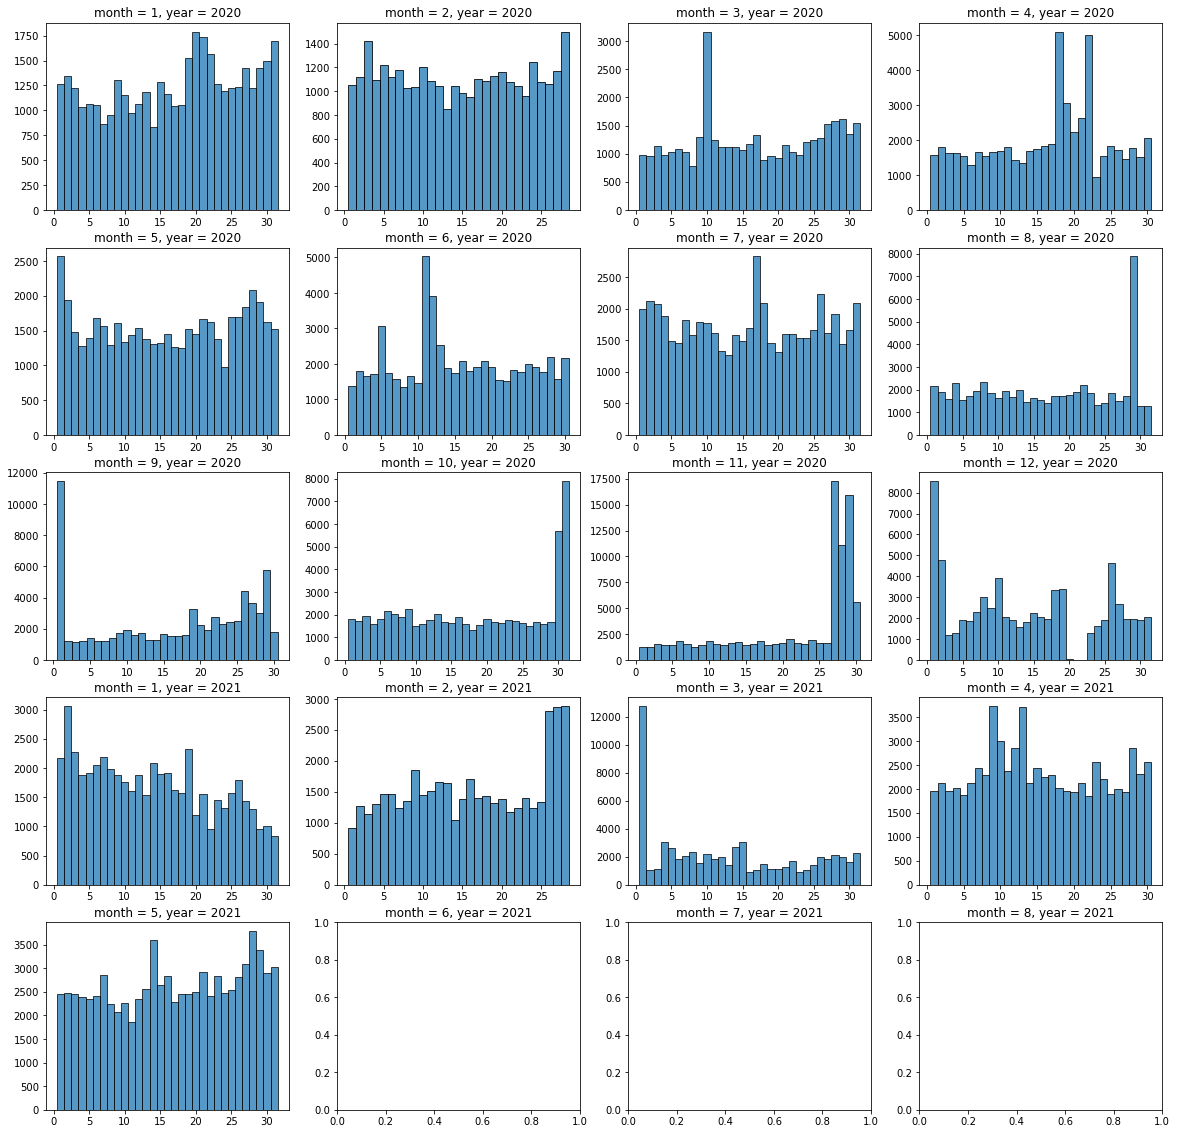

In [104]:
# Devo far 17 plots (16 mesi di lunghezza)
n_rows = 5
n_col = 4

fig, axs = plt.subplots(nrows=n_rows, ncols=n_col, figsize = (20,20))
month = 1
year = 2020
for i, ax in enumerate(fig.axes):
    if month == 13:
        month = 1
        year += 1
    plot_data = purchases_mapped[(purchases_mapped['month'] == month) & (purchases_mapped['year'] == year)]
    sns.histplot(data = plot_data['day'], discrete=True, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"month = {month}, year = {year}")
    month += 1

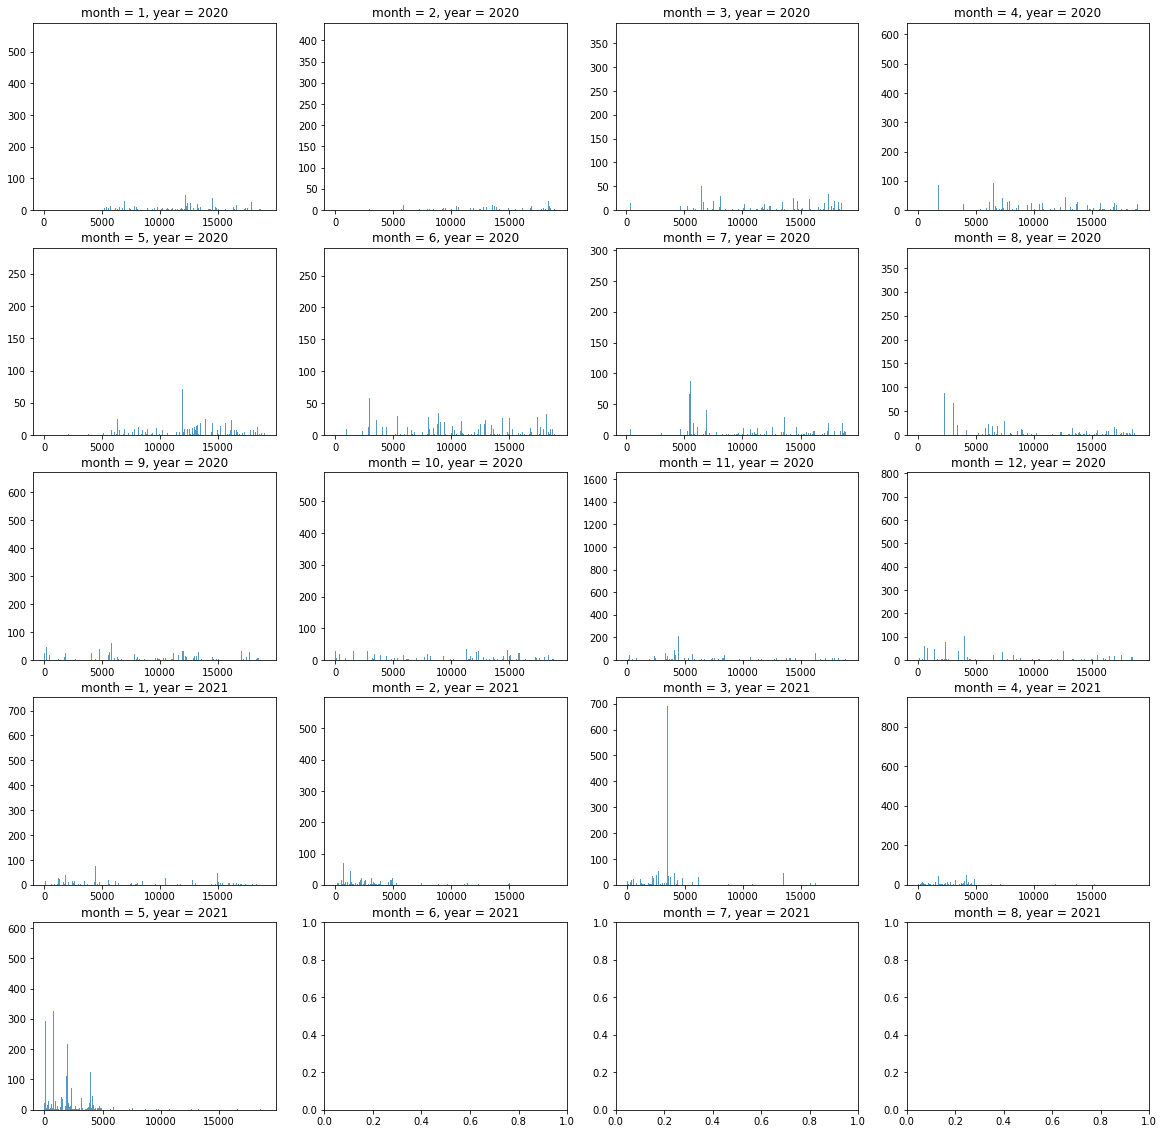

In [105]:
# Devo far 17 plots (16 mesi di lunghezza)
n_rows = 5
n_col = 4

fig, axs = plt.subplots(nrows=n_rows, ncols=n_col, figsize = (20,20))
month = 1
year = 2020
for i, ax in enumerate(fig.axes):
    if month == 13:
        month = 1
        year += 1
    plot_data = purchases_mapped[(purchases_mapped['month'] == month) & (purchases_mapped['year'] == year)]
    sns.histplot(data = plot_data['item_id'], discrete=True, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"month = {month}, year = {year}")
    month += 1

[(0.0, 35.0)]

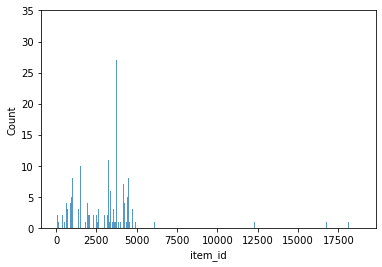

In [112]:
# Check product bought on the first of march 2021

plot_data = purchases_mapped[(purchases_mapped['month'] == 3) & (purchases_mapped['year'] == 2021) & (purchases_mapped['day'] == 1)]
hist = sns.histplot(data = plot_data['item_id'], discrete=True)
hist.set(ylim=(0, 35))

In [116]:
purchases_mapped[(purchases_mapped['month'] == 3) & (purchases_mapped['year'] == 2021) & (purchases_mapped['day'] == 1)]['item_id'].unique()

array([ 2124,   609,  4175, ...,  1905, 12534,  3119])

In [117]:
purchases_mapped[(purchases_mapped['month'] == 3) & (purchases_mapped['year'] == 2021) & (purchases_mapped['day'] == 2)]['item_id'].unique()

array([  458,  6264,  8176,   956, 12735,  2969,   379,  2824,  3700,
        2533,   101,  3840,  3712,   786,  4916,  2895,  4151,  2541,
        5147,  1134,  3318,  1038,  1285,   554,  2804,   671,  1827,
       18257,   788,  4736, 16971,  2335,  1423,  4024,  2504, 15033,
         875,  3062,  3930,  4821,  3152,   607,  4361,   219,   330,
        4950,   823,  4934,  2424,  2666,  1400,   363,  1538, 14062,
        4827,  2137,  4430,  3924,  4673,  4892,  2080,   429,  3665,
        9647,  3066,   993,  2553,   883,  4196,  4336,  3746,  1927,
        4672,  4399,  3692, 14182,  3567,  3507,  2169,  3217,  1377,
        1106,  1129,   917,  1613,  6925,  2934,   990,  1336,   281,
        2532,  4211,  3526,  3250,  3537,  3593,   333,  2915,  7265,
        2133,   608, 10259,  1620, 15721,  2813,  1653,  3873,   635,
       17436,   421,  4631,   239,  2470,  4935,  7774,  2953,   819,
        3135,  4522,  4106,  2540, 14745,  3884,  4167, 10675,  1680,
        1996,  1457,